In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
pd.set_option("display.max_columns", 63)

In [2]:
df = pd.read_csv("../data/input/mht2016.csv")

In [3]:
renamed_columns = ['self_empl_flag', 'comp_no_empl', 'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag',
                  'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
                  'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork',
                  'mh_discussion_supervis', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_coverage_flag2', 'mh_online_res_flag',
                  'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact',
                  'mh_prod_impact', 'mh_prod_impact_perc', 'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness',
                  'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq',
                  'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers',
                  'future_ph_specification', 'why/why_not', 'future_mh_specification', 'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork',
                  'mh_sharing_friends/fam_flag', 'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist',
                  'mh_disorder_past', 'mh_disorder_current', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'mh_diagnos_proffesional',
                  'yes:condition_diagnosed', 'mh_sought_proffes_treatm', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work',
                  'age', 'sex', 'country_live', 'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position', 'remote_flag']

In [4]:
#creo un dizionario per tenere traccia delle domande
diz_colonne = {x:y for x, y in zip(renamed_columns, list(df.columns))}

In [5]:
df.columns = renamed_columns

In [6]:
df

,self_empl_flag,comp_no_empl,tech_comp_flag,tech_role_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,mh_eq_ph_employer,mh_conseq_coworkers,mh_coverage_flag2,mh_online_res_flag,mh_diagnosed&reveal_clients_flag,mh_diagnosed&reveal_clients_impact,mh_diagnosed&reveal_cowork_flag,mh_cowork_reveal_neg_impact,mh_prod_impact,mh_prod_impact_perc,prev_employers_flag,prev_mh_benefits,prev_mh_benefits_awareness,prev_mh_discussion,prev_mh_resources,prev_mh_anonimity,prev_mh_discuss_neg_conseq,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_importance_employer,prev_mh_conseq_coworkers,future_ph_specification,why/why_not,future_mh_specification,why/why_not2,mh_hurt_on_career,mh_neg_view_cowork,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_for_others_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_disorder_current,yes:what_diagnosis?,maybe:whats_your_diag,mh_diagnos_proffesional,yes:condition_diagnosed,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,live_us_teritory,country_work,work_us_teritory,work_position,remote_flag
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,NaN,Maybe,NaN,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,No,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,Yes,No,Maybe,No,NaN,NaN,No,NaN,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"Yes, I know several","Sometimes, if it comes up",I'm not sure,"Sometimes, if it comes up",I'm not sure,Yes,1-25%,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,NaN,No,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-2

In [7]:
df['sex'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 'Male', inplace = True)

df['sex'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 'Female', inplace = True)

df['sex'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman'], value = 'Non-binary', inplace = True)

In [8]:
df['sex'].value_counts()

Male          1060
Female         343
Non-binary      27
Name: sex, dtype: int64

Ci sono alcuni valori errati nell'età (3, 15, 99, 323), che abbiamo sostituito con la media delle età corrette

In [9]:
mean_age = df[(df['age'] >= 18) | (df['age'] <= 75)]['age'].mean()
df['age'].replace(to_replace = df[(df['age'] < 18) | (df['age'] > 75)]['age'].tolist(), value = mean_age, inplace = True)

In [10]:
mean_age

34.28611304954641

Valori mancanti

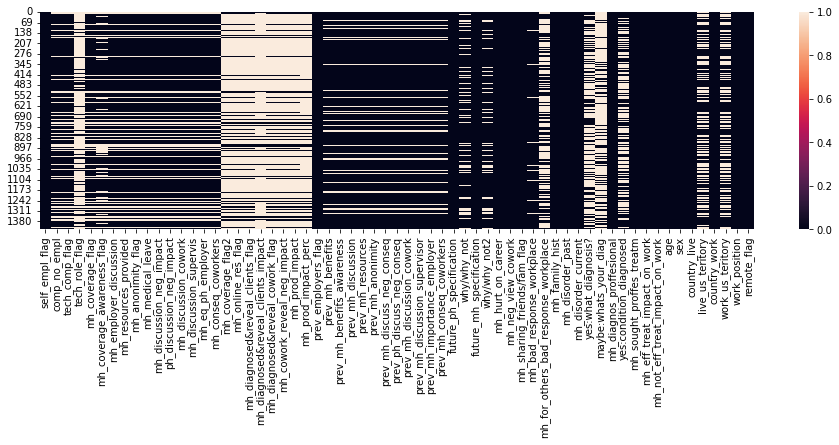

In [11]:
plt.figure(figsize = (16,4))
sns.heatmap(data = df.isna());

In [12]:
diz_colonne.values()

dict_values(['Are you self-employed?', 'How many employees does your company or organization have?', 'Is your employer primarily a tech company/organization?', 'Is your primary role within your company related to tech/IT?', 'Does your employer provide mental health benefits as part of healthcare coverage?', 'Do you know the options for mental health care available under your employer-provided coverage?', 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?', 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:', 'Do you think that discussing a mental health disorder with your employer would have n

In [13]:
"""'What country do you live in?', 'What US state or territory do you live in?', 'What country do you work in?', 'What US state or territory do you work in?'
'Are you self-employed?'
"""

"'What country do you live in?', 'What US state or territory do you live in?', 'What country do you work in?', 'What US state or territory do you work in?'\n'Are you self-employed?'\n"

In [14]:
list(diz_colonne.keys())[0]

'self_empl_flag'

In [15]:
list(diz_colonne.keys())[-6:-2]

['country_live', 'live_us_teritory', 'country_work', 'work_us_teritory']

In [16]:
df = df.drop(['country_live', 'live_us_teritory', 'yes:condition_diagnosed',
                'country_work', 'work_us_teritory', 'self_empl_flag'], axis = 1)
df

,comp_no_empl,tech_comp_flag,tech_role_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,mh_eq_ph_employer,mh_conseq_coworkers,mh_coverage_flag2,mh_online_res_flag,mh_diagnosed&reveal_clients_flag,mh_diagnosed&reveal_clients_impact,mh_diagnosed&reveal_cowork_flag,mh_cowork_reveal_neg_impact,mh_prod_impact,mh_prod_impact_perc,prev_employers_flag,prev_mh_benefits,prev_mh_benefits_awareness,prev_mh_discussion,prev_mh_resources,prev_mh_anonimity,prev_mh_discuss_neg_conseq,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_importance_employer,prev_mh_conseq_coworkers,future_ph_specification,why/why_not,future_mh_specification,why/why_not2,mh_hurt_on_career,mh_neg_view_cowork,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_for_others_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_disorder_current,yes:what_diagnosis?,maybe:whats_your_diag,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,work_position,remote_flag
0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,NaN,Maybe,NaN,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,No,NaN,NaN,Yes,0,Not applicable to me,Not applicable to me,39.0,Male,Back-end Developer,Sometimes
1,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,1,Rarely,Sometimes,29.0,Male,Back-end Developer|Front-end Developer,Never
2,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,Yes,No,Maybe,No,NaN,NaN,No,1,Not applicable to me,Not applicable to me,38.0,Male,Back-end Developer,Always
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"Yes, I know several","Sometimes, if it comes up",I'm not sure,"Sometimes, if it comes up",I'm not sure,Yes,1-25%,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,NaN,No,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,1,Sometimes,Sometimes,43.0,Male,Supervisor/Team Lead,Sometimes
4,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,Maybe,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,I don't know,N/A (not currently aware),Some did,None did,I don't know,Some of them,Some of them,"No, at none of my previous employers",Some of my previous employers,Some did,Some of them,Maybe,Depending on the interview stage and whether I...,No,I don't know,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",Yes,Ye

In [17]:
cols = (df.isna().sum() >= df.shape[0]/2).tolist()
to_drop = df.columns[cols]
df.drop(labels = to_drop, axis = 1, inplace = True)

# Dealing with other missing values
from sklearn.impute import SimpleImputer

# Impute nan with the most frequent value (mode) on every row
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df)
imp_data = pd.DataFrame(data = imp.transform(df), columns = df.columns)

In [18]:
imp_data

,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,mh_eq_ph_employer,mh_conseq_coworkers,prev_employers_flag,prev_mh_benefits,prev_mh_benefits_awareness,prev_mh_discussion,prev_mh_resources,prev_mh_anonimity,prev_mh_discuss_neg_conseq,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_importance_employer,prev_mh_conseq_coworkers,future_ph_specification,why/why_not,future_mh_specification,why/why_not2,mh_hurt_on_career,mh_neg_view_cowork,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_disorder_current,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,work_position,remote_flag
0,26-100,1.0,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Fear of discrimination,Maybe,Stigma,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me,39.0,Male,Back-end Developer,Sometimes
1,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,Yes,1,Rarely,Sometimes,29.0,Male,Back-end Developer|Front-end Developer,Never
2,6-25,1.0,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,Not applicable to me,38.0,Male,Back-end Developer,Always
3,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,Yes,I don't know,No,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,No,Yes,Yes,Yes,1,Sometimes,Sometimes,43.0,Male,Supervisor/Team Lead,Sometimes
4,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,Maybe,No,No,No,1,I don't know,N/A (not currently aware),Some did,None did,I don't know,Some of them,Some of them,"No, at none of my previous employers",Some of my previous employers,Some did,Some of them,Maybe,Depending on the interview stage and whether I...,No,I don't know,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",Yes,Yes,Yes,Yes,1,Sometimes,Sometimes,43.0,Female,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,Yes,I don't know,No,1,"Yes, they all did",I was aware of some,Some did,Some did,I don't know,I don't know,None of them,Some of my previous employers,Some of my previous employers,Some did,None of them,No,I believe my health information is my personal...,No,"As previously stated, my health infor

In [19]:
imp_data.describe()

,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,mh_eq_ph_employer,mh_conseq_coworkers,prev_employers_flag,prev_mh_benefits,prev_mh_benefits_awareness,prev_mh_discussion,prev_mh_resources,prev_mh_anonimity,prev_mh_discuss_neg_conseq,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_importance_employer,prev_mh_conseq_coworkers,future_ph_specification,why/why_not,future_mh_specification,why/why_not2,mh_hurt_on_career,mh_neg_view_cowork,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_disorder_current,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,work_position,remote_flag
count,1433,1433.0,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433.0,1433,1433,1433
unique,6,2.0,4,3,3,3,3,6,3,3,3,3,3,2,2,4,4,4,3,4,4,3,3,4,4,3,3,1085,3,1080,5,5,6,4,3,3,3,2,2,5,5,49.0,3,264,3
top,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,Yes,I don't know,No,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,None did,None of them,Maybe,Fear of discrimination,No,Stigma,Maybe,Maybe,Somewhat open,No,Yes,Yes,Yes,No,1,Not applicable to me,Often,30.0,Male,Back-end Developer,Sometimes
freq,579,1170.0,818,774,1100,818,1029,568,774,1124,766,715,780,1335,1264,560,751,1059,1011,1029,784,800,909,823,632,927,633,341,883,321,588,591,640,656,670,736,575,717,839,557,538,94.0,1063,263,757


In [20]:
imp_data['mh_coverage_flag'].unique()

array(['Not eligible for coverage / N/A', 'No', 'Yes', "I don't know"],
      dtype=object)

In [21]:
domanda = diz_colonne['mh_coverage_flag']
risposte = imp_data['mh_coverage_flag'].unique()
print(domanda)
print(risposte)

Does your employer provide mental health benefits as part of healthcare coverage?
['Not eligible for coverage / N/A' 'No' 'Yes' "I don't know"]


In [27]:
diz_colonne['mh_disorder_current']

'Do you currently have a mental health disorder?'

In [29]:
y = imp_data['mh_disorder_current']

In [30]:
X = imp_data.drop('mh_disorder_current', axis = 1)

In [32]:
y

0          No
1         Yes
2          No
3         Yes
4         Yes
        ...  
1428       No
1429       No
1430    Maybe
1431      Yes
1432      Yes
Name: mh_disorder_current, Length: 1433, dtype: object

In [34]:
cat_columns = list(X.select_dtypes(include=['category','object']))
cat_columns

['comp_no_empl',
 'tech_comp_flag',
 'mh_coverage_flag',
 'mh_coverage_awareness_flag',
 'mh_employer_discussion',
 'mh_resources_provided',
 'mh_anonimity_flag',
 'mh_medical_leave',
 'mh_discussion_neg_impact',
 'ph_discussion_neg_impact',
 'mh_discussion_cowork',
 'mh_discussion_supervis',
 'mh_eq_ph_employer',
 'mh_conseq_coworkers',
 'prev_employers_flag',
 'prev_mh_benefits',
 'prev_mh_benefits_awareness',
 'prev_mh_discussion',
 'prev_mh_resources',
 'prev_mh_anonimity',
 'prev_mh_discuss_neg_conseq',
 'prev_ph_discuss_neg_conseq',
 'prev_mh_discussion_cowork',
 'prev_mh_discussion_supervisor',
 'prev_mh_importance_employer',
 'prev_mh_conseq_coworkers',
 'future_ph_specification',
 'why/why_not',
 'future_mh_specification',
 'why/why_not2',
 'mh_hurt_on_career',
 'mh_neg_view_cowork',
 'mh_sharing_friends/fam_flag',
 'mh_bad_response_workplace',
 'mh_family_hist',
 'mh_disorder_past',
 'mh_diagnos_proffesional',
 'mh_sought_proffes_treatm',
 'mh_eff_treat_impact_on_work',
 'mh_

In [35]:
len(cat_columns)

44

In [64]:
temp = X.describe().T['unique'] < 10

In [65]:
cat = []
for i in range(len(temp)):
    if temp[i]:
        cat.append(temp.index[i])
cat

['comp_no_empl',
 'tech_comp_flag',
 'mh_coverage_flag',
 'mh_coverage_awareness_flag',
 'mh_employer_discussion',
 'mh_resources_provided',
 'mh_anonimity_flag',
 'mh_medical_leave',
 'mh_discussion_neg_impact',
 'ph_discussion_neg_impact',
 'mh_discussion_cowork',
 'mh_discussion_supervis',
 'mh_eq_ph_employer',
 'mh_conseq_coworkers',
 'prev_employers_flag',
 'prev_mh_benefits',
 'prev_mh_benefits_awareness',
 'prev_mh_discussion',
 'prev_mh_resources',
 'prev_mh_anonimity',
 'prev_mh_discuss_neg_conseq',
 'prev_ph_discuss_neg_conseq',
 'prev_mh_discussion_cowork',
 'prev_mh_discussion_supervisor',
 'prev_mh_importance_employer',
 'prev_mh_conseq_coworkers',
 'future_ph_specification',
 'future_mh_specification',
 'mh_hurt_on_career',
 'mh_neg_view_cowork',
 'mh_sharing_friends/fam_flag',
 'mh_bad_response_workplace',
 'mh_family_hist',
 'mh_disorder_past',
 'mh_diagnos_proffesional',
 'mh_sought_proffes_treatm',
 'mh_eff_treat_impact_on_work',
 'mh_not_eff_treat_impact_on_work',
 '

In [66]:
all_col = cat.copy().append('age')

In [70]:
X[cat].describe()

,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,mh_eq_ph_employer,mh_conseq_coworkers,prev_employers_flag,prev_mh_benefits,prev_mh_benefits_awareness,prev_mh_discussion,prev_mh_resources,prev_mh_anonimity,prev_mh_discuss_neg_conseq,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_importance_employer,prev_mh_conseq_coworkers,future_ph_specification,future_mh_specification,mh_hurt_on_career,mh_neg_view_cowork,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,sex,remote_flag
count,1433,1433.0,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433
unique,6,2.0,4,3,3,3,3,6,3,3,3,3,3,2,2,4,4,4,3,4,4,3,3,4,4,3,3,3,5,5,6,4,3,3,2,2,5,5,3,3
top,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,Yes,I don't know,No,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,None did,None of them,Maybe,No,Maybe,Maybe,Somewhat open,No,Yes,Yes,No,1,Not applicable to me,Often,Male,Sometimes
freq,579,1170.0,818,774,1100,818,1029,568,774,1124,766,715,780,1335,1264,560,751,1059,1011,1029,784,800,909,823,632,927,633,883,588,591,640,656,670,736,717,839,557,538,1063,757


In [71]:
enc = OneHotEncoder(handle_unknown='ignore')

In [78]:
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [79]:
enc.fit_transform(X)

<1433x2619 sparse matrix of type '<class 'numpy.float64'>'
	with 63052 stored elements in Compressed Sparse Row format>

In [80]:
X

,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,mh_eq_ph_employer,mh_conseq_coworkers,prev_employers_flag,prev_mh_benefits,prev_mh_benefits_awareness,prev_mh_discussion,prev_mh_resources,prev_mh_anonimity,prev_mh_discuss_neg_conseq,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_importance_employer,prev_mh_conseq_coworkers,future_ph_specification,why/why_not,future_mh_specification,why/why_not2,mh_hurt_on_career,mh_neg_view_cowork,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,work_position,remote_flag
0,26-100,1.0,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Fear of discrimination,Maybe,Stigma,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,Yes,0,Not applicable to me,Not applicable to me,39.0,Male,Back-end Developer,Sometimes
1,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,1,Rarely,Sometimes,29.0,Male,Back-end Developer|Front-end Developer,Never
2,6-25,1.0,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,1,Not applicable to me,Not applicable to me,38.0,Male,Back-end Developer,Always
3,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,Yes,I don't know,No,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,No,Yes,Yes,1,Sometimes,Sometimes,43.0,Male,Supervisor/Team Lead,Sometimes
4,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,Maybe,No,No,No,1,I don't know,N/A (not currently aware),Some did,None did,I don't know,Some of them,Some of them,"No, at none of my previous employers",Some of my previous employers,Some did,Some of them,Maybe,Depending on the interview stage and whether I...,No,I don't know,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",Yes,Yes,Yes,1,Sometimes,Sometimes,43.0,Female,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,Yes,I don't know,No,1,"Yes, they all did",I was aware of some,Some did,Some did,I don't know,I don't know,None of them,Some of my previous employers,Some of my previous employers,Some did,None of them,No,I believe my health information is my personal...,No,"As previously stated, my health information is...",Maybe,Maybe,Somewhat open,Ma

In [81]:
df = X.copy()

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# supponiamo che il tuo dataframe si chiami "df"
# e che le colonne categoriche abbiano l'etichetta "object" nel dataframe
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# definisci la trasformazione da applicare alle colonne categoriche
transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)],
    remainder='passthrough'
)

# applica la trasformazione al dataframe
df_encoded = transformer.fit_transform(df)
df_encoded

<1433x2619 sparse matrix of type '<class 'numpy.float64'>'
	with 63052 stored elements in Compressed Sparse Row format>

In [85]:
pd.DataFrame(df_encoded)

,0
0,"(0, 2)\t1.0\n (0, 7)\t1.0\n (0, 10)\t1.0\n..."
1,"(0, 4)\t1.0\n (0, 7)\t1.0\n (0, 9)\t1.0\n ..."
2,"(0, 4)\t1.0\n (0, 7)\t1.0\n (0, 9)\t1.0\n ..."
3,"(0, 2)\t1.0\n (0, 7)\t1.0\n (0, 11)\t1.0\n..."
4,"(0, 4)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
1428,"(0, 2)\t1.0\n (0, 7)\t1.0\n (0, 11)\t1.0\n..."
1429,"(0, 2)\t1.0\n (0, 7)\t1.0\n (0, 11)\t1.0\n..."
1430,"(0, 1)\t1.0\n (0, 7)\t1.0\n (0, 11)\t1.0\n..."
1431,"(0, 1)\t1.0\n (0, 6)\t1.0\n (0, 8)\t1.0\n ..."


In [109]:
l = ['mh_not_eff_treat_impact_on_work',
'mh_diagnos_proffesional',
'mh_eff_treat_impact_on_work',
'mh_sought_proffes_treatm',
'mh_disorder_past',
'mh_family_hist',
'mh_sharing_friends/fam_flag',
'mh_bad_response_workplace',
'mh_coverage_flag',
'mh_discussion_cowork',

'mh_disorder_past',
'mh_not_eff_treat_impact_on_work',
'mh_eff_treat_impact_on_work',
'mh_sought_proffes_treatm',
'mh_sharing_friends/fam_flag',
'mh_family_hist',
'mh_bad_response_workplace',
'mh_discussion_cowork',
'mh_coverage_flag']

In [110]:
l = list(set(l))

In [111]:
len(l)

10

In [112]:
l.append('sex')

In [113]:
l.append('age')

In [114]:
df[l]

,mh_family_hist,mh_disorder_past,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_not_eff_treat_impact_on_work,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_discussion_cowork,mh_eff_treat_impact_on_work,mh_coverage_flag,sex,age
0,No,Yes,Yes,0,Not applicable to me,Somewhat open,No,Maybe,Not applicable to me,Not eligible for coverage / N/A,Male,39.0
1,Yes,Yes,Yes,1,Sometimes,Somewhat open,No,Maybe,Rarely,No,Male,29.0
2,No,Maybe,No,1,Not applicable to me,Somewhat open,Maybe/Not sure,Maybe,Not applicable to me,No,Male,38.0
3,No,Yes,Yes,1,Sometimes,Neutral,No,Maybe,Sometimes,Yes,Male,43.0
4,Yes,Yes,Yes,1,Sometimes,Somewhat open,"Yes, I experienced",Maybe,Sometimes,Yes,Female,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1428,Yes,No,No,1,Not applicable to me,Somewhat open,Maybe/Not sure,Maybe,Not applicable to me,Yes,Female,34.0
1429,Yes,No,Yes,0,Often,Somewhat not open,Maybe/Not sure,Maybe,Sometimes,Yes,Male,56.0
1430,Yes,Yes,Yes,1,Sometimes,Somewhat open,"Yes, I observed",Yes,Rarely,Yes,Male,52.0
1431,Yes,Maybe,Yes,0,Often,Somewhat open,"Yes, I experienced",Maybe,Sometimes,I don't know,Female,30.0
